In [8]:
import numpy as ny
from matplotlib import pyplot
%matplotlib inline

In [9]:
T = 100.0
dt = 0.02
N = int(T/dt)+1
t = ny.linspace(0.0, T, N)

In [75]:
z0 = 100.  
b0 = 10.
c0 = 0.
d0 = 11.
zt = 100.
g  = 9.81
u = ny.array([z0, b0])
v = ny.array([z0, c0])
w = ny.array([z0, d0])
z1 = ny.zeros(N)
z1[0] = z0  
z2 = ny.zeros(N)
z2[0] = z0  
z3 = ny.zeros(N)
z3[0] = z0  

In [76]:
for n in range(1,N):
    u = u + dt*ny.array([u[1], g*(1-u[0]/zt)])
    z1[n] = u[0]

In [77]:
for n in range(1,N):
    v = v + dt*ny.array([v[1], g*(1-v[0]/zt)])
    z2[n] = v[0]

In [78]:
for n in range(1,N):
    w = w + dt*ny.array([w[1], g*(1-v[0]/zt)])
    z3[n] = w[0]

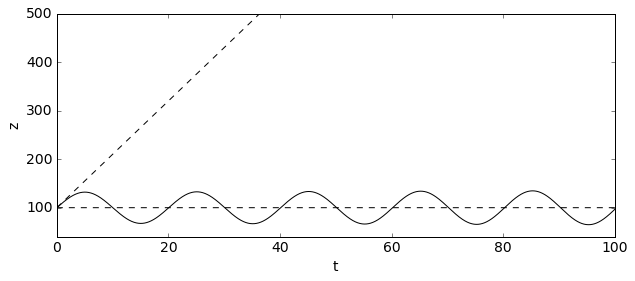

In [84]:
pyplot.figure(figsize=(10,4))   
pyplot.ylim(40,500)             
pyplot.tick_params(axis='both', labelsize=14) 
pyplot.xlabel('t', fontsize=14) 
pyplot.ylabel('z', fontsize=14) 
pyplot.plot(t,z1, 'k-');
pyplot.plot(t,z2, 'k--');
pyplot.plot(t,z3, 'k--');

In [85]:
z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
            (z0-zt)*numpy.cos((g/zt)**.5*t)+zt

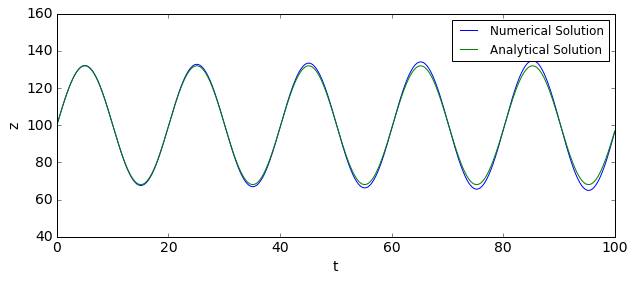

In [87]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)             
pyplot.tick_params(axis='both', labelsize=14) 
pyplot.xlabel('t', fontsize=14) 
pyplot.ylabel('z', fontsize=14) 
pyplot.plot(t,z1)
pyplot.plot(t, z_exact)
pyplot.legend(['Numerical Solution','Analytical Solution']);

In [88]:
dt_values = ny.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

z_values = ny.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1 
    t = numpy.linspace(0.0, T, N)

    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
  
    for n in range(1,N):
        
        u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0]  
    
    z_values[i] = z.copy()   

In [89]:
def get_error(z, dt):
    """Returns the error relative to analytical solution using L-1 norm.
    
    Parameters
    ----------
    z : array of float
        numerical solution.
    dt : float
        time increment.
        
    Returns
    -------
    err : float
        L_{1} norm of the error with respect to the exact solution.
    """
    N = len(z)
    t = numpy.linspace(0.0, T, N)
    
    z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
                (z0-zt)*numpy.cos((g/zt)**.5*t)+zt
    
    return dt * numpy.sum(numpy.abs(z-z_exact))

In [93]:
error_values = ny.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    error_values[i] = get_error(z_values[i], dt)

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

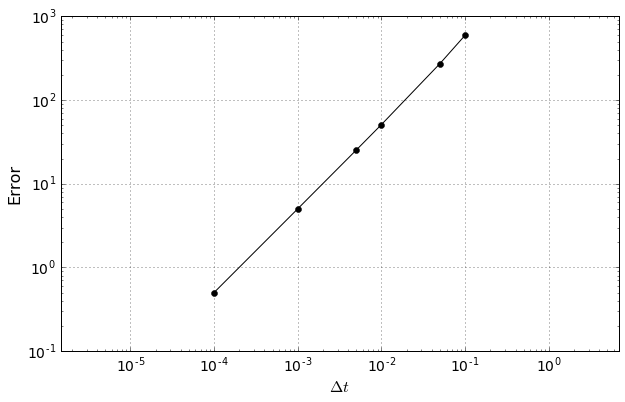

In [94]:
pyplot.figure(figsize=(10, 6))
pyplot.tick_params(axis='both', labelsize=14) 
pyplot.grid(True)   
pyplot.xlabel('$\Delta t$', fontsize=16)
pyplot.ylabel('Error', fontsize=16)   
pyplot.loglog(dt_values, error_values, 'ko-') 
pyplot.axis('equal') 